In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from collections import Counter
import librosa.display
import datetime
import time
import os
import json

from src.data import AcousticSceneMusicSegmentation
from src.utils import print_and_log
from src.models import Segmenter1d

/opt/conda/lib/python3.6/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [2]:
if torch.cuda.is_available():  
    device = torch.device("cuda:0")
else:  
    device = torch.device("cpu") 

In [3]:
hparams = {
    'checkpoint' : None,
    'freesound_dir' : None,
    'sample_rate' : 16000,
    'n_samples' : 160000,
    'feature_type' : 'mel',
    'random_crop' : True,
    'resize' : None,
    'normalize' : True,
    'standardize' : True,
    'standardize_mean' : 0.4299,
    'standardize_std' : 0.1770,
    'spec_augment' : 'freq',
    'random_volume_reduction' : True,
    'n_epochs' : 50,
    'batch_size' : 16,
    'lr' : 0.0001,
    'hidden_dim' : 512,
    'display_iters' : 100,
    'val_iters' : 1000,
    'n_val_samples' : 1000, 
    'n_early_stopping' : 5 # stop if validation doesn't improve after this number of validation cycles
}

In [4]:
train_dataset = AcousticSceneMusicSegmentation(
    'data/DCASE2018/Task1', 
    'data/nsynth', 
    'train',
    freesound_dir=hparams['freesound_dir'],
    sample_rate=hparams['sample_rate'],
    n_samples=hparams['n_samples'],
    random_crop=hparams['random_crop'],
    feature_type=hparams['feature_type'],
    resize=hparams['resize'],
    normalize=hparams['normalize'],
    standardize=hparams['standardize'],
    standardize_mean=hparams['standardize_mean'],
    standardize_std=hparams['standardize_std'],
    spec_augment=hparams['spec_augment'],
    random_volume_reduction=hparams['random_volume_reduction']
)

val_dataset = AcousticSceneMusicSegmentation(
    'data/DCASE2018/Task1', 
    'data/nsynth', 
    'val',
    freesound_dir=hparams['freesound_dir'],
    sample_rate=hparams['sample_rate'],
    n_samples=hparams['n_samples'],
    random_crop=False,
    feature_type=hparams['feature_type'],
    resize=hparams['resize'],
    normalize=hparams['normalize'],
    standardize=hparams['standardize'],
    standardize_mean=hparams['standardize_mean'],
    standardize_std=hparams['standardize_std'],
    spec_augment=False,
    random_volume_reduction=hparams['random_volume_reduction']
)

In [5]:
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=hparams['batch_size'], shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=hparams['batch_size'], shuffle=True)

In [6]:
model = Segmenter1d(h_dim=hparams['hidden_dim']).to(device)
print('# of parameters : {}'.format(sum(p.numel() for p in model.parameters() if p.requires_grad)))

# of parameters : 5425089


In [7]:
optimizer = torch.optim.Adam(model.parameters(), lr=hparams['lr'])

In [8]:
timestamp = datetime.datetime.fromtimestamp(time.time()).strftime('%Y%m%d-%H%M%S')
results_dir = 'train_results/segmentation/{}'.format(timestamp)
os.makedirs(results_dir)

with open(os.path.join(results_dir, 'hparams.json'), 'w') as fp:
    json.dump(hparams, fp)

log_file = os.path.join(results_dir, 'train_log.txt')
log = open(log_file, 'w')
log.close()
print_and_log('{} {}'.format(train_dataset.__class__.__name__, model.__class__.__name__), log_file)

for k, v in hparams.items(): print_and_log('{} : {}'.format(k, v), log_file)

AcousticSceneMusicSegmentation Segmenter1d


[0,     1] loss : 0.7350
[0,   100] loss : 0.5542
[0,   200] loss : 0.3536
[0,   300] loss : 0.4449
[0,   400] loss : 0.3227
[0,   500] loss : 0.2995
Val - loss : 0.3497


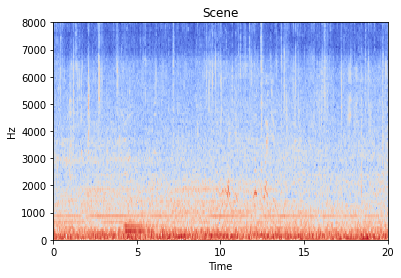

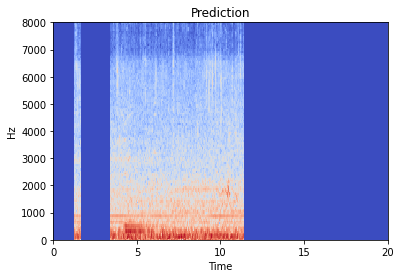

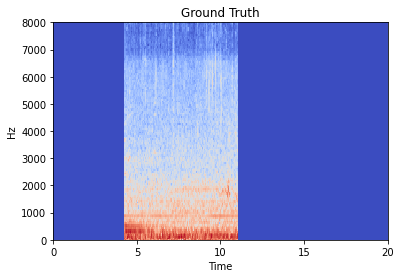

Weights saved in train_results/segmentation/20200803-214304/model-540.weights
[1,   600] loss : 0.2213
[1,   700] loss : 0.2886
[1,   800] loss : 0.2954
[1,   900] loss : 0.1393
[1,  1000] loss : 0.1683
Val - loss : 0.2602


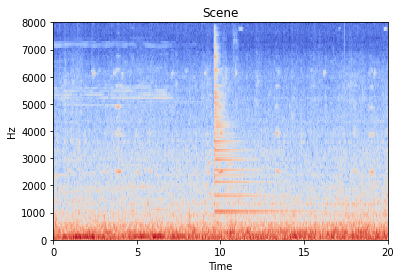

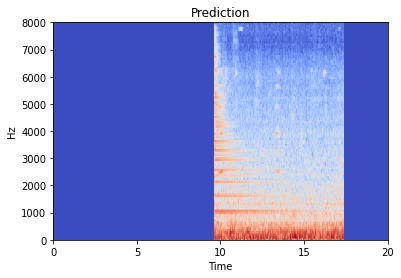

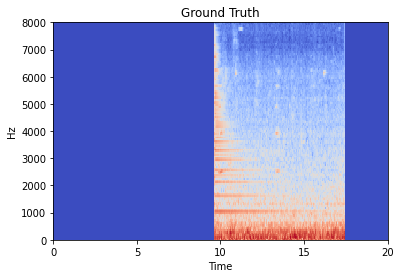

Weights saved in train_results/segmentation/20200803-214304/model-1080.weights
[2,  1100] loss : 0.2300
[2,  1200] loss : 0.1856
[2,  1300] loss : 0.2818
[2,  1400] loss : 0.2305
[2,  1500] loss : 0.1383
[2,  1600] loss : 0.2285
Val - loss : 0.2790


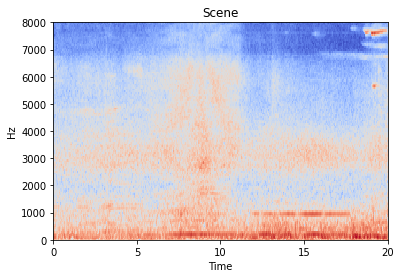

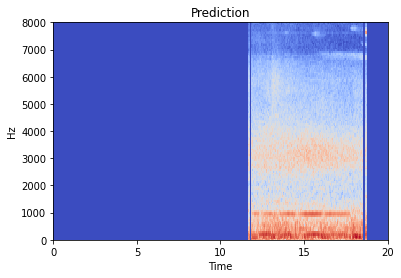

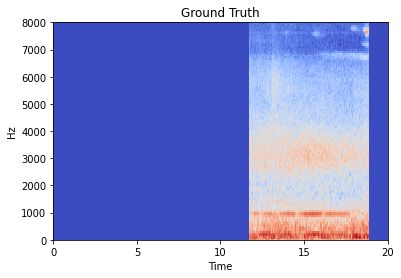

[3,  1700] loss : 0.2744
[3,  1800] loss : 0.1697
[3,  1900] loss : 0.1637
[3,  2000] loss : 0.1915
[3,  2100] loss : 0.2087
Val - loss : 0.2123


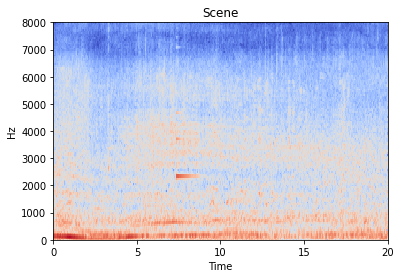

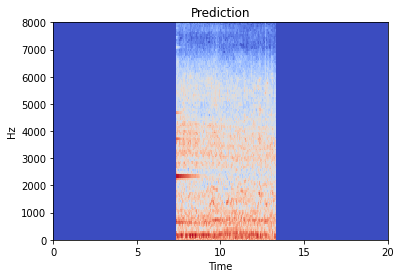

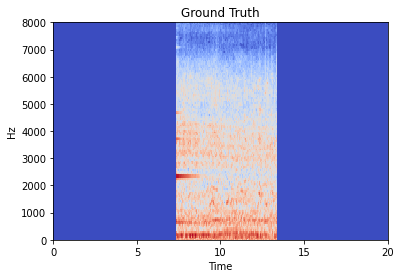

Weights saved in train_results/segmentation/20200803-214304/model-2160.weights
[4,  2200] loss : 0.2284
[4,  2300] loss : 0.2407
[4,  2400] loss : 0.1430
[4,  2500] loss : 0.0960
[4,  2600] loss : 0.1695
[4,  2700] loss : 0.1268
Val - loss : 0.2307


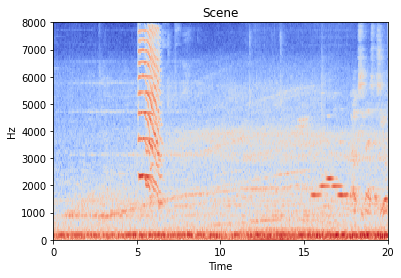

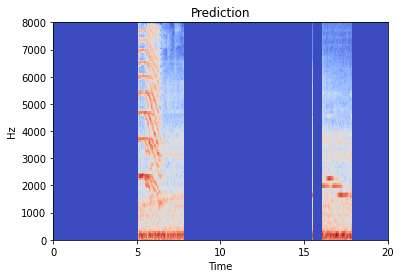

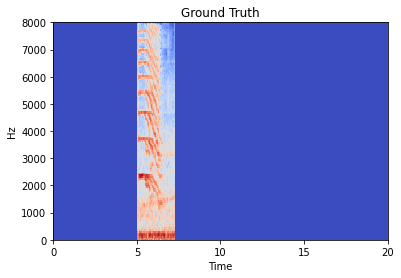

[5,  2800] loss : 0.1571
[5,  2900] loss : 0.1929
[5,  3000] loss : 0.2250
[5,  3100] loss : 0.1881
[5,  3200] loss : 0.1976
Val - loss : 0.2164


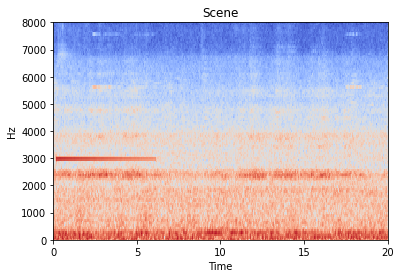

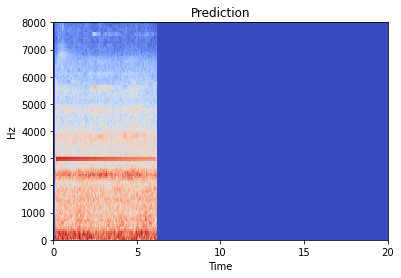

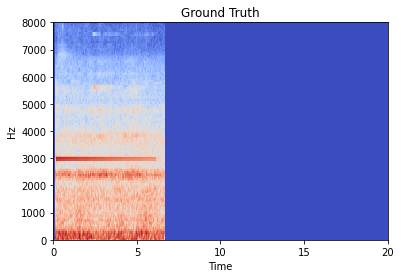

[6,  3300] loss : 0.2051
[6,  3400] loss : 0.1946
[6,  3500] loss : 0.2705
[6,  3600] loss : 0.2407
[6,  3700] loss : 0.1393
Val - loss : 0.2023


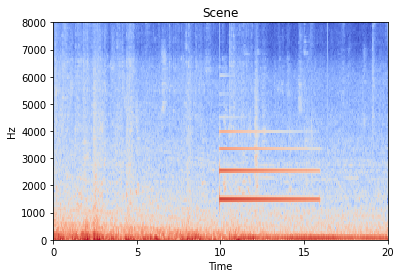

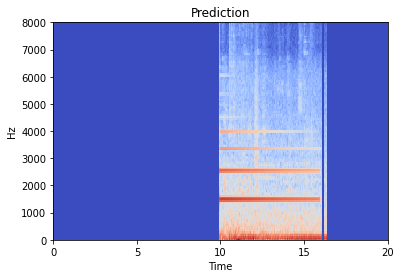

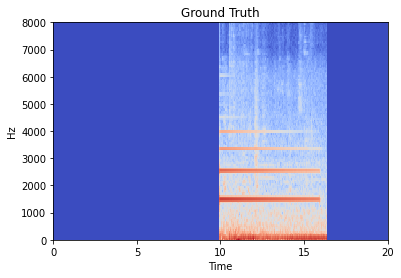

Weights saved in train_results/segmentation/20200803-214304/model-3780.weights
[7,  3800] loss : 0.2110
[7,  3900] loss : 0.0998
[7,  4000] loss : 0.2580
[7,  4100] loss : 0.1875
[7,  4200] loss : 0.1569
[7,  4300] loss : 0.1062
Val - loss : 0.2165


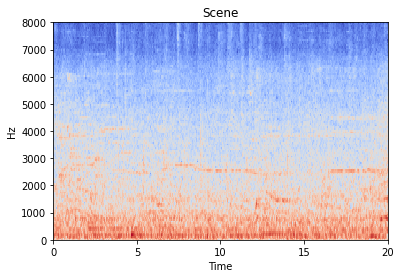

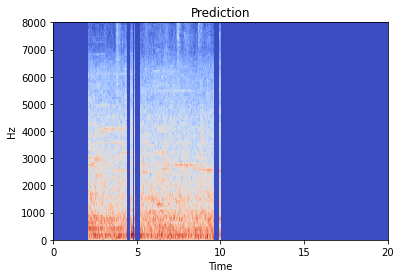

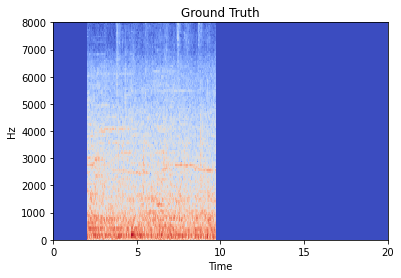

[8,  4400] loss : 0.1818
[8,  4500] loss : 0.1738
[8,  4600] loss : 0.1502
[8,  4700] loss : 0.2189
[8,  4800] loss : 0.2558
Val - loss : 0.1828


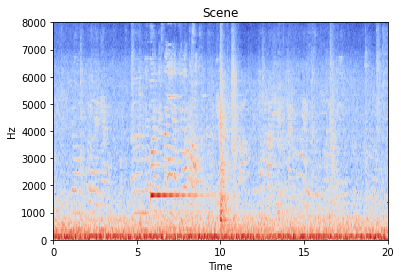

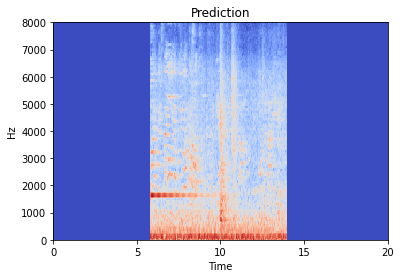

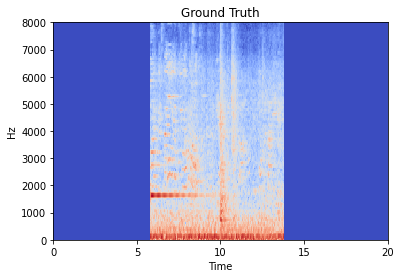

Weights saved in train_results/segmentation/20200803-214304/model-4860.weights
[9,  4900] loss : 0.1739
[9,  5000] loss : 0.1938
[9,  5100] loss : 0.0565
[9,  5200] loss : 0.1630
[9,  5300] loss : 0.2316
[9,  5400] loss : 0.1958
Val - loss : 0.1741


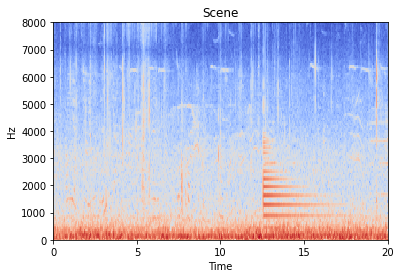

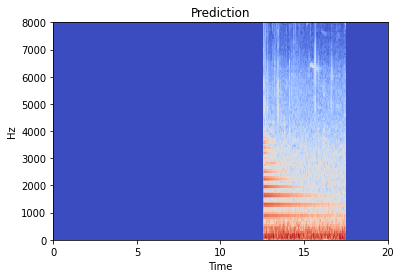

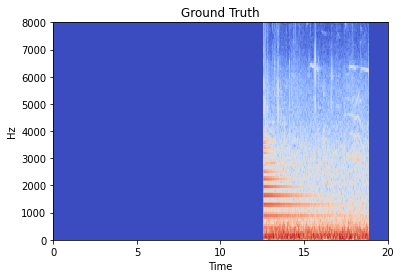

Weights saved in train_results/segmentation/20200803-214304/model-5400.weights
[10,  5500] loss : 0.1507
[10,  5600] loss : 0.1911
[10,  5700] loss : 0.1715
[10,  5800] loss : 0.1461
[10,  5900] loss : 0.1241
Val - loss : 0.1721


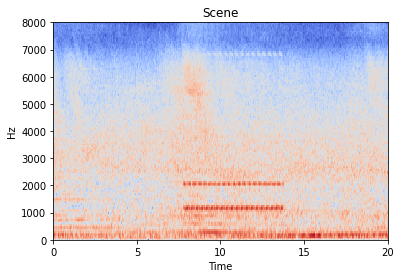

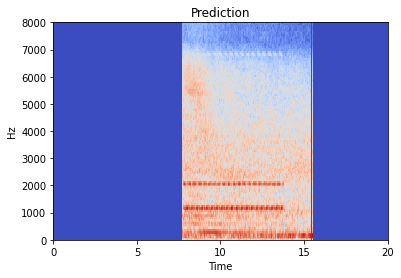

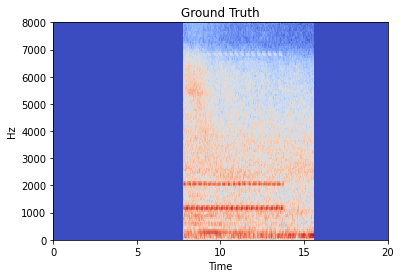

Weights saved in train_results/segmentation/20200803-214304/model-5940.weights
[11,  6000] loss : 0.0719
[11,  6100] loss : 0.1722
[11,  6200] loss : 0.0856
[11,  6300] loss : 0.1255
[11,  6400] loss : 0.1166
Val - loss : 0.2073


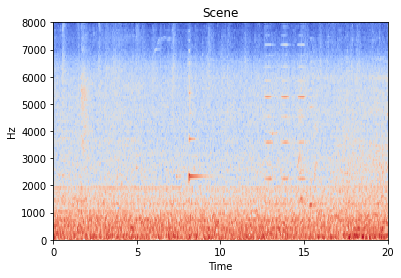

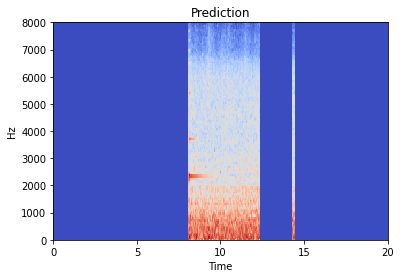

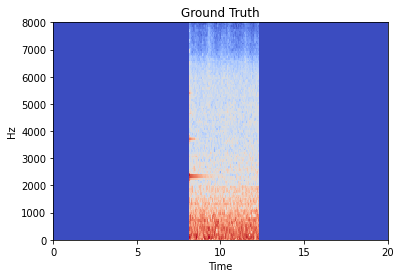

[12,  6500] loss : 0.2537
[12,  6600] loss : 0.1337
[12,  6700] loss : 0.1463
[12,  6800] loss : 0.1871
[12,  6900] loss : 0.1840
[12,  7000] loss : 0.1121
Val - loss : 0.2166


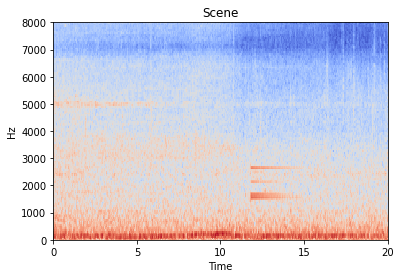

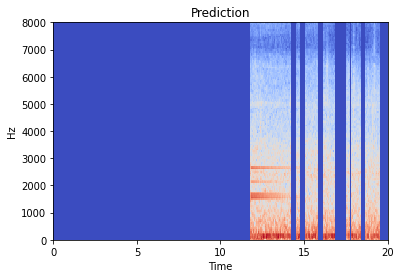

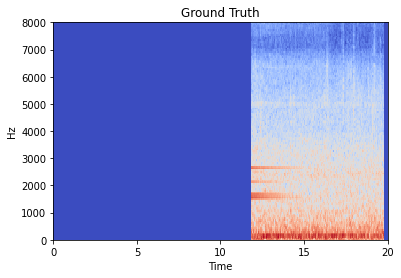

[13,  7100] loss : 0.1085
[13,  7200] loss : 0.1321
[13,  7300] loss : 0.1938
[13,  7400] loss : 0.0916
[13,  7500] loss : 0.0867
Val - loss : 0.1627


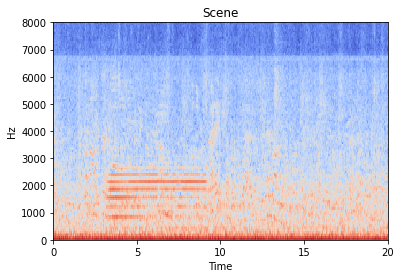

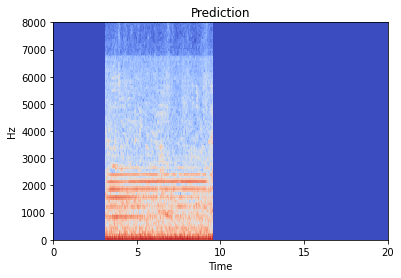

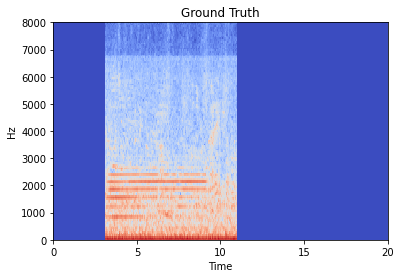

Weights saved in train_results/segmentation/20200803-214304/model-7560.weights
[14,  7600] loss : 0.1599
[14,  7700] loss : 0.2543
[14,  7800] loss : 0.0957
[14,  7900] loss : 0.1599
[14,  8000] loss : 0.2820
[14,  8100] loss : 0.1782
Val - loss : 0.1565


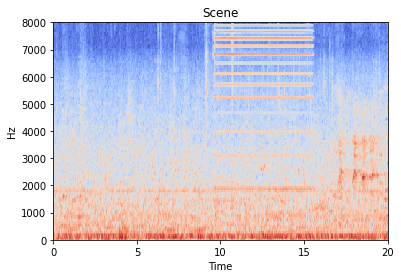

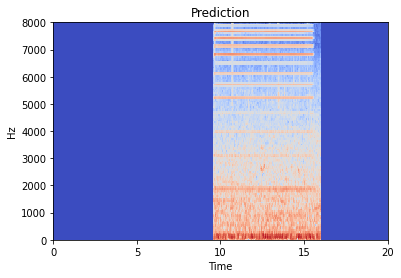

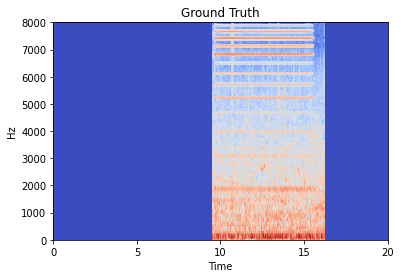

Weights saved in train_results/segmentation/20200803-214304/model-8100.weights
[15,  8200] loss : 0.1877
[15,  8300] loss : 0.0617
[15,  8400] loss : 0.1075
[15,  8500] loss : 0.1760
[15,  8600] loss : 0.1820
Val - loss : 0.3502


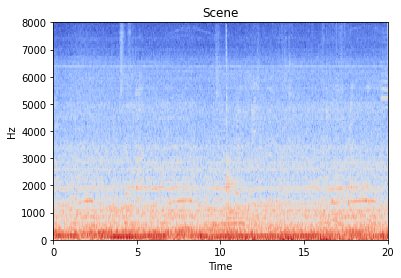

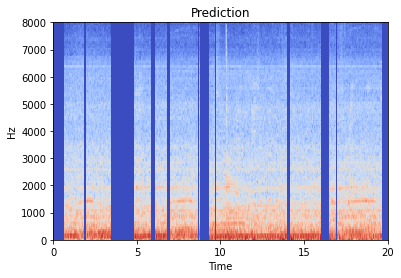

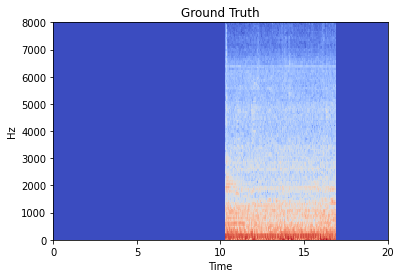

[16,  8700] loss : 0.1364
[16,  8800] loss : 0.1478
[16,  8900] loss : 0.1782
[16,  9000] loss : 0.0465
[16,  9100] loss : 0.1948
Val - loss : 0.1571


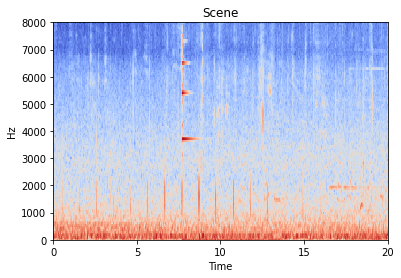

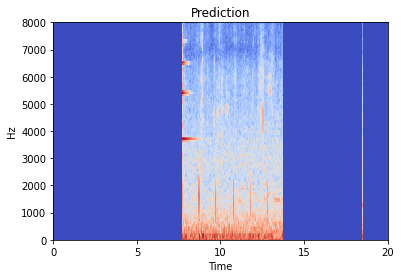

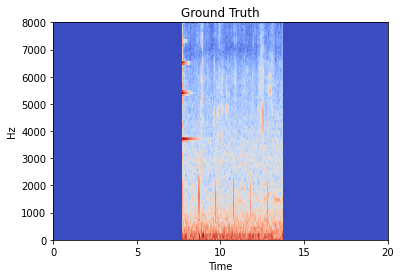

[17,  9200] loss : 0.2744
[17,  9300] loss : 0.1782
[17,  9400] loss : 0.2316
[17,  9500] loss : 0.1096
[17,  9600] loss : 0.2007
[17,  9700] loss : 0.1804
Val - loss : 0.1556


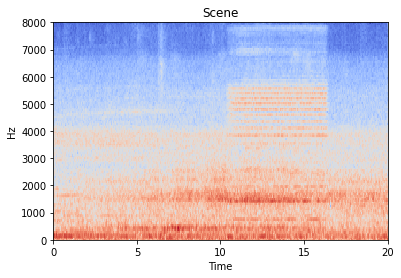

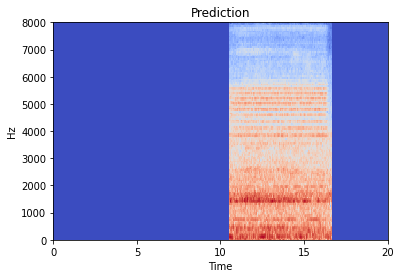

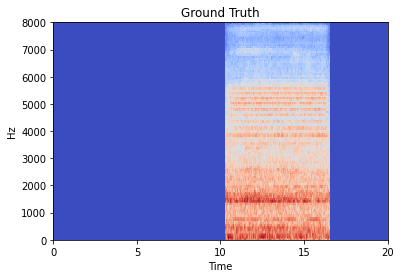

Weights saved in train_results/segmentation/20200803-214304/model-9720.weights
[18,  9800] loss : 0.1102
[18,  9900] loss : 0.1422
[18, 10000] loss : 0.1273
[18, 10100] loss : 0.1591
[18, 10200] loss : 0.1472
Val - loss : 0.1707


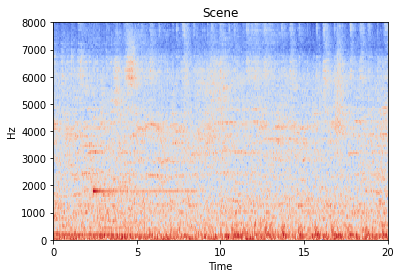

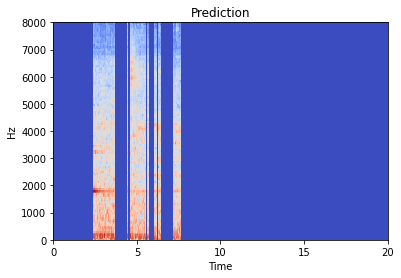

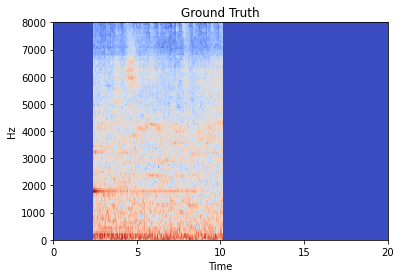

[19, 10300] loss : 0.0691
[19, 10400] loss : 0.0905
[19, 10500] loss : 0.1164
[19, 10600] loss : 0.1136
[19, 10700] loss : 0.0669
[19, 10800] loss : 0.0627
Val - loss : 0.2970


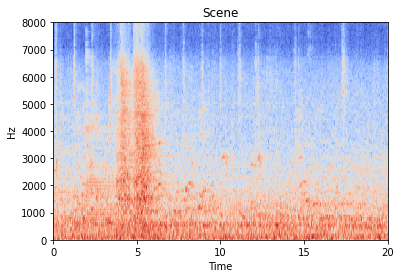

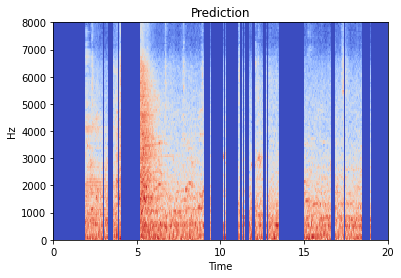

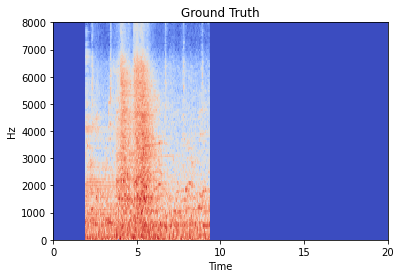

[20, 10900] loss : 0.0885
[20, 11000] loss : 0.1296
[20, 11100] loss : 0.0731
[20, 11200] loss : 0.1765
[20, 11300] loss : 0.1005
Val - loss : 0.1737


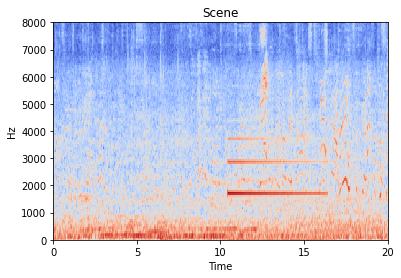

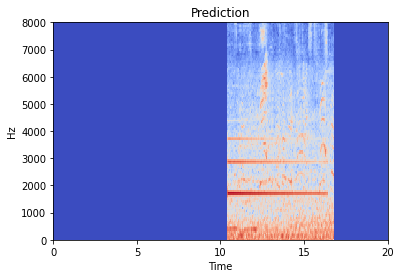

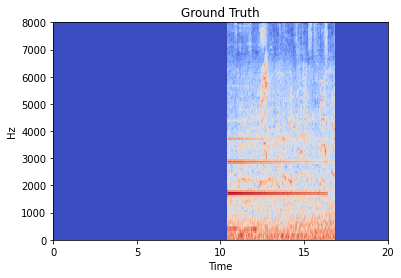

[21, 11400] loss : 0.0609
[21, 11500] loss : 0.1382
[21, 11600] loss : 0.2421
[21, 11700] loss : 0.1092
[21, 11800] loss : 0.1381
Val - loss : 0.1496


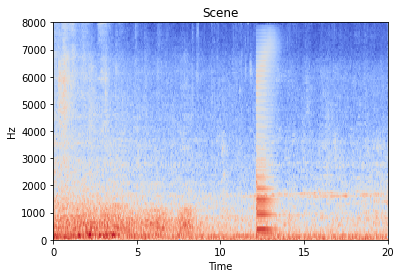

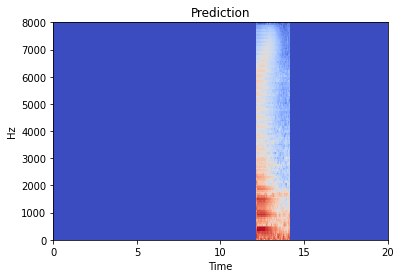

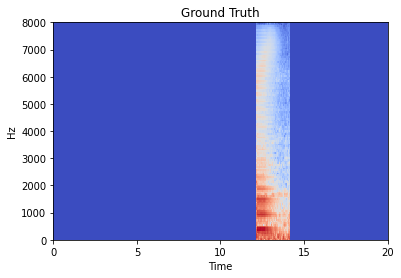

Weights saved in train_results/segmentation/20200803-214304/model-11880.weights
[22, 11900] loss : 0.0789
[22, 12000] loss : 0.1243
[22, 12100] loss : 0.2720
[22, 12200] loss : 0.1171
[22, 12300] loss : 0.1187
[22, 12400] loss : 0.2130
Val - loss : 0.1654


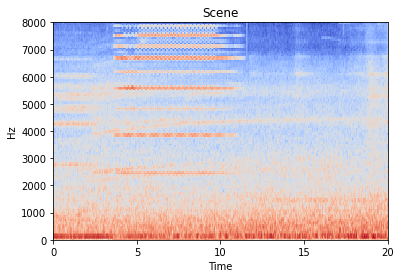

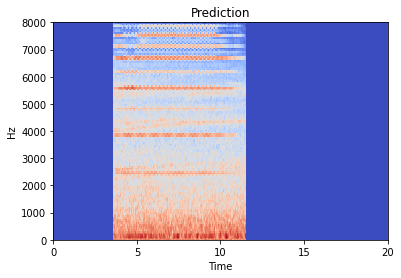

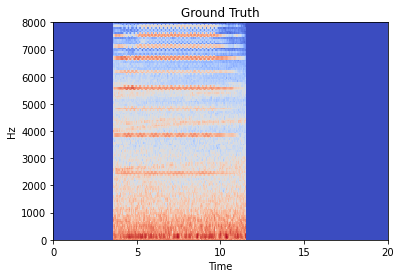

[23, 12500] loss : 0.1676
[23, 12600] loss : 0.1430
[23, 12700] loss : 0.1568
[23, 12800] loss : 0.0706
[23, 12900] loss : 0.1524
Val - loss : 0.1485


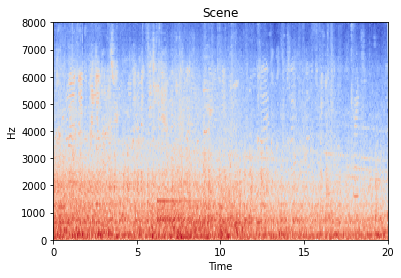

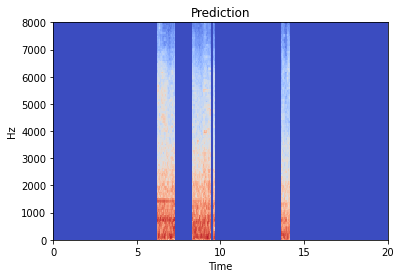

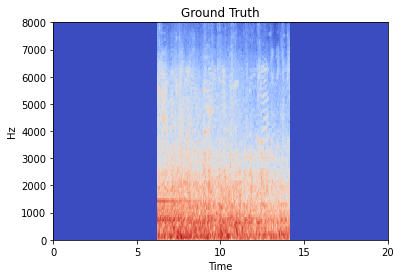

Weights saved in train_results/segmentation/20200803-214304/model-12960.weights
[24, 13000] loss : 0.1199
[24, 13100] loss : 0.2913
[24, 13200] loss : 0.1042
[24, 13300] loss : 0.0815
[24, 13400] loss : 0.0719
[24, 13500] loss : 0.1141
Val - loss : 0.1395


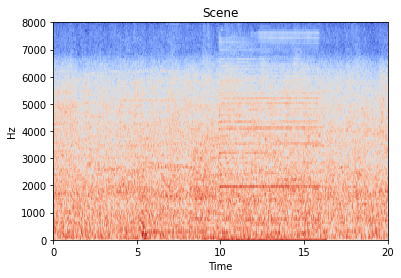

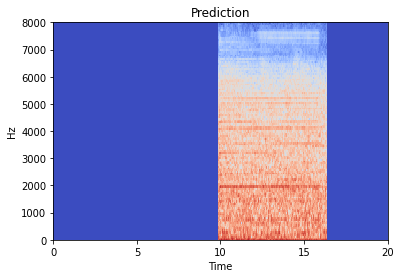

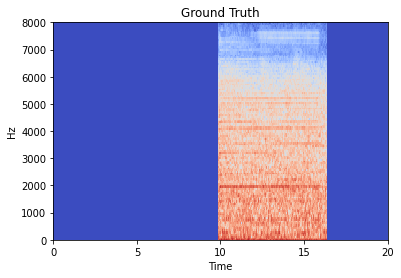

Weights saved in train_results/segmentation/20200803-214304/model-13500.weights
[25, 13600] loss : 0.1038
[25, 13700] loss : 0.1700
[25, 13800] loss : 0.0983
[25, 13900] loss : 0.1840
[25, 14000] loss : 0.1572
Val - loss : 0.1597


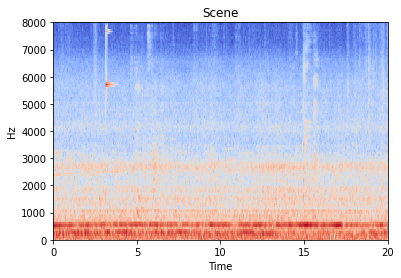

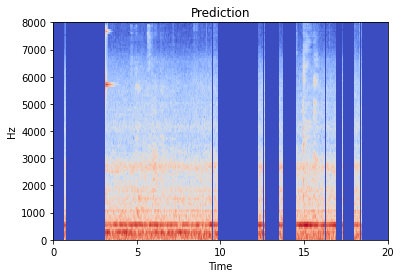

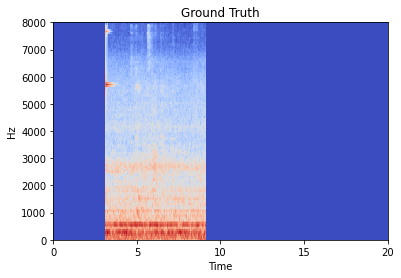

[26, 14100] loss : 0.1372
[26, 14200] loss : 0.1237
[26, 14300] loss : 0.2245
[26, 14400] loss : 0.1528
[26, 14500] loss : 0.1164
Val - loss : 0.1359


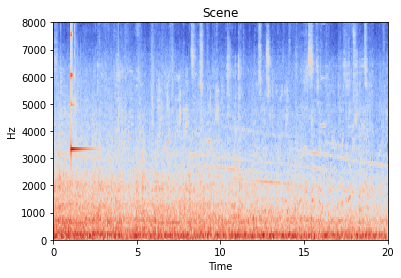

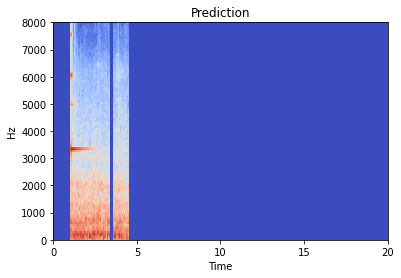

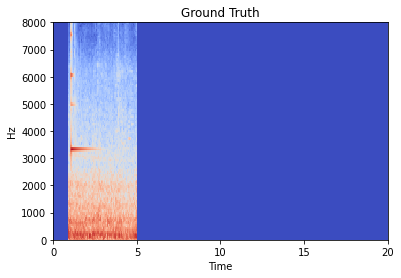

Weights saved in train_results/segmentation/20200803-214304/model-14580.weights
[27, 14600] loss : 0.1319
[27, 14700] loss : 0.1649
[27, 14800] loss : 0.0993
[27, 14900] loss : 0.0789
[27, 15000] loss : 0.0578
[27, 15100] loss : 0.1514
Val - loss : 0.1422


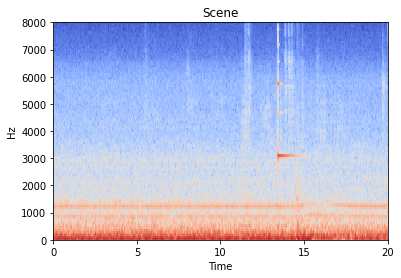

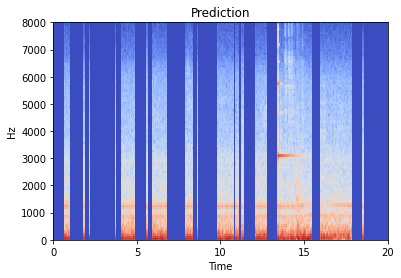

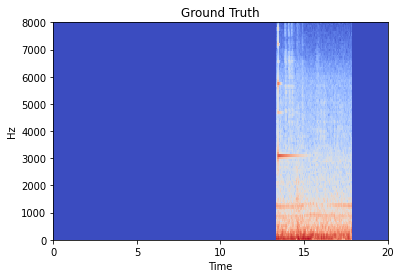

[28, 15200] loss : 0.1991
[28, 15300] loss : 0.1043
[28, 15400] loss : 0.1627
[28, 15500] loss : 0.1836
[28, 15600] loss : 0.0461
Val - loss : 0.1973


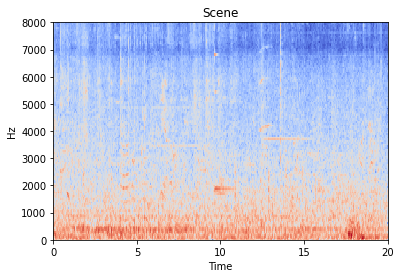

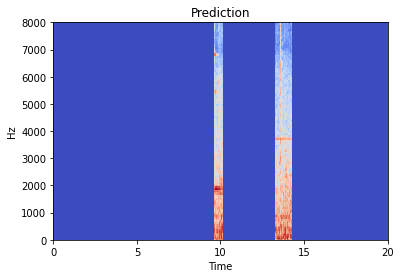

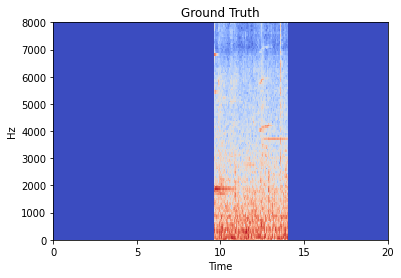

[29, 15700] loss : 0.1318
[29, 15800] loss : 0.0603
[29, 15900] loss : 0.0621
[29, 16000] loss : 0.2566
[29, 16100] loss : 0.1442
[29, 16200] loss : 0.0635
Val - loss : 0.1669


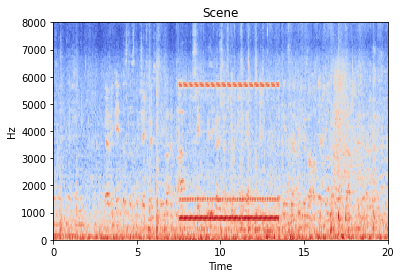

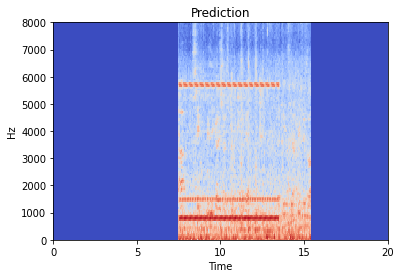

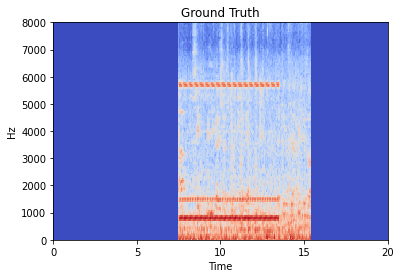

[30, 16300] loss : 0.1496
[30, 16400] loss : 0.0880
[30, 16500] loss : 0.1036
[30, 16600] loss : 0.0904
[30, 16700] loss : 0.0600


In [ ]:
loss_fn = nn.BCELoss()

ckpt_weights_path = None
best_loss = 1e10
since_best = 0
done = False

if hparams['checkpoint']:
    print_and_log('Resuming training from {}'.format(hparams['checkpoint']), log_file)
    ckpt = torch.load(hparams['checkpoint'])
    epoch = ckpt['epoch']
    itr = ckpt['itr']
    optimizer.load_state_dict(ckpt['optimizer'])
    model.load_state_dict(ckpt['model'])
    best_loss = ckpt['best_loss']
else:
    epoch = 0
    itr = 0

for epoch in range(epoch, hparams['n_epochs']):
    if done:
        break
        
    for batch in train_dataloader:
        if done:
            break
            
        itr += 1
        features = batch[0].to(device)
        labels = batch[1].to(device)
        outputs = model(features)
        
        loss = loss_fn(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (itr % hparams['display_iters'] == 0) or (itr == 1):
            print_and_log('[{}, {:5d}] loss : {:.4f}'.format(epoch, itr, loss.item()), log_file)
                        
    model.eval()
    with torch.no_grad():
        ct, i, val_loss = 0, 0, 0.0
        for batch in val_dataloader:
            i += 1
            ct += batch[0].size(0)
            features = batch[0].to(device)
            labels = batch[1].to(device)
            outputs = model(features)

            loss = loss_fn(outputs, labels)

            val_loss += (loss.item() - val_loss)/i

            if ct >= hparams['n_val_samples']:
                break
                
    print_and_log('Val - loss : {:.4f}'.format(val_loss), log_file)
    
    # display example segmented spectrogram
    scene = features[0].cpu().numpy().squeeze()
    pred_mask = (outputs[0].detach().cpu().numpy() > 0.5).astype(float)
    true_mask = labels[0].detach().cpu().numpy()
    
    pred_segment = np.ones_like(scene)*scene.min() * (1 - pred_mask) + pred_mask*scene
    true_segment = np.ones_like(scene)*scene.min() * (1 - true_mask) + true_mask*scene

    librosa.display.specshow(scene, sr=16000, x_axis='time', y_axis='hz')
    plt.title('Scene')
    plt.show()
    librosa.display.specshow(pred_segment, sr=16000, x_axis='time', y_axis='hz')
    plt.title('Prediction')
    plt.show()
    librosa.display.specshow(true_segment, sr=16000, x_axis='time', y_axis='hz')
    plt.title('Ground Truth')
    plt.show()

    if val_loss < best_loss:
        since_best = 0
        best_loss = val_loss

        # save weights
        ckpt_weights_path = os.path.join(results_dir, 'model-{}.weights'.format(itr))
        torch.save(model.state_dict(), ckpt_weights_path)
        print_and_log('Weights saved in {}'.format(ckpt_weights_path), log_file)

        # save meta information
        ckpt_meta_path = os.path.join(results_dir, 'checkpoint')
        torch.save({
            'best_loss' : best_loss,
            'epoch' : epoch,
            'itr' : itr,
            'optimizer' : optimizer.state_dict(),
            'model' : model.state_dict()
        }, ckpt_meta_path)
    else:
        since_best += 1
        if since_best >= hparams['n_early_stopping']:
            done = True
            print_and_log('Early stopping... training complete', log_file)

    model.train()